In [39]:
import matplotlib.pyplot as plt
import numpy as np
import os, scipy, pickle
import matplotlib
from matplotlib.lines import Line2D

if os.getcwd().split(os.sep)[-1] == "examples":
    os.chdir('..')

# We import the model, stimuli, and the optimal control package
from neurolib.models.wc import WCModel
from neurolib.utils.stimulus import ZeroInput
from neurolib.optimal_control import oc_wc
from neurolib.optimal_control import cost_functions as cost_functions
from neurolib.optimal_control.oc_utils.plot_oc import get_prc, plot_prc, ops_plot_traces, ops_ap_scenes_allpoints, ops_plotsubset
import scipy

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
fs_ = 16

plt.rcParams["axes.titlesize"] = fs_
plt.rcParams["axes.labelsize"] = fs_
plt.rcParams["lines.markersize"] = 8
plt.rcParams.update({"font.size": fs_})
matplotlib.rc("xtick", labelsize=fs_)
matplotlib.rc("ytick", labelsize=fs_)
plt.rc("legend", fontsize=fs_)

In [3]:
wc = WCModel()
wc.params.sigma_ou = 0.
dt = 0.01
wc.params.dt = dt
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration

points = [[1.,0.], [2.5,0.], [2.6, 1.2], [1.75, 0.]]
periods_dt = np.zeros((4))
for i in range(len(points)):
    wc.params["exc_ext"] = zero_input + points[i][0]
    wc.params["inh_ext"] = zero_input + points[i][1]

    wc.run()
    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    p_list = []
    for j in range(3,len(peaks)):
        p_list.append(peaks[j]- peaks[j-1])
    periods_dt[i] = np.mean(p_list)*dt


print(periods_dt)

[18.45384615 18.83307692 17.45785714 14.99823529]


In [93]:
wc = WCModel()
wc.params.sigma_ou = 0.
dt = 0.1
wc.params.dt = dt
duration = 300.
zero_input = ZeroInput().generate_input(duration=duration+dt, dt=dt)

wc.params["duration"] = duration

points = [[1.,0.], [2.5,0.], [2.6, 1.2], [1.75, 0.]]
periods = np.zeros((4))
mh = np.zeros((4))
for i in range(len(points)):
    wc.params["exc_ext"] = zero_input + points[i][0]
    wc.params["inh_ext"] = zero_input + points[i][1]

    wc.run()
    peaks = scipy.signal.find_peaks(wc.exc[0,:])[0]
    p_list = []
    for j in range(3,len(peaks)):
        p_list.append(peaks[j]- peaks[j-1])
    periods[i] = np.mean(p_list)*dt

    mh[i] = max(np.amax(wc.exc[0,:]), np.amax(wc.inh[0,:]))

print(periods)
print(mh)

[18.89230769 19.06923077 20.82727273 15.28823529]
[0.3230633  0.49161979 0.49793344 0.46484453]


In [5]:
savepath = ( '..' + os.sep + '..' + os.sep + '..' + os.sep + '..' + os.sep + 'writing' + os.sep +
                        'paper2_chaos' + os.sep + 'opt_phase_shift' + os.sep + 'images' + os.sep)

openpath = ('..' + os.sep + 'ps_data' + os.sep)

open_add_sc = ['optimal_phase_shift_sc0', 'optimal_phase_shift_sc1', 'optimal_phase_shift_sc2']
add_point = ['a', 'b', 'c', 'd']
add_sc = ['s1', 's2', 's3']

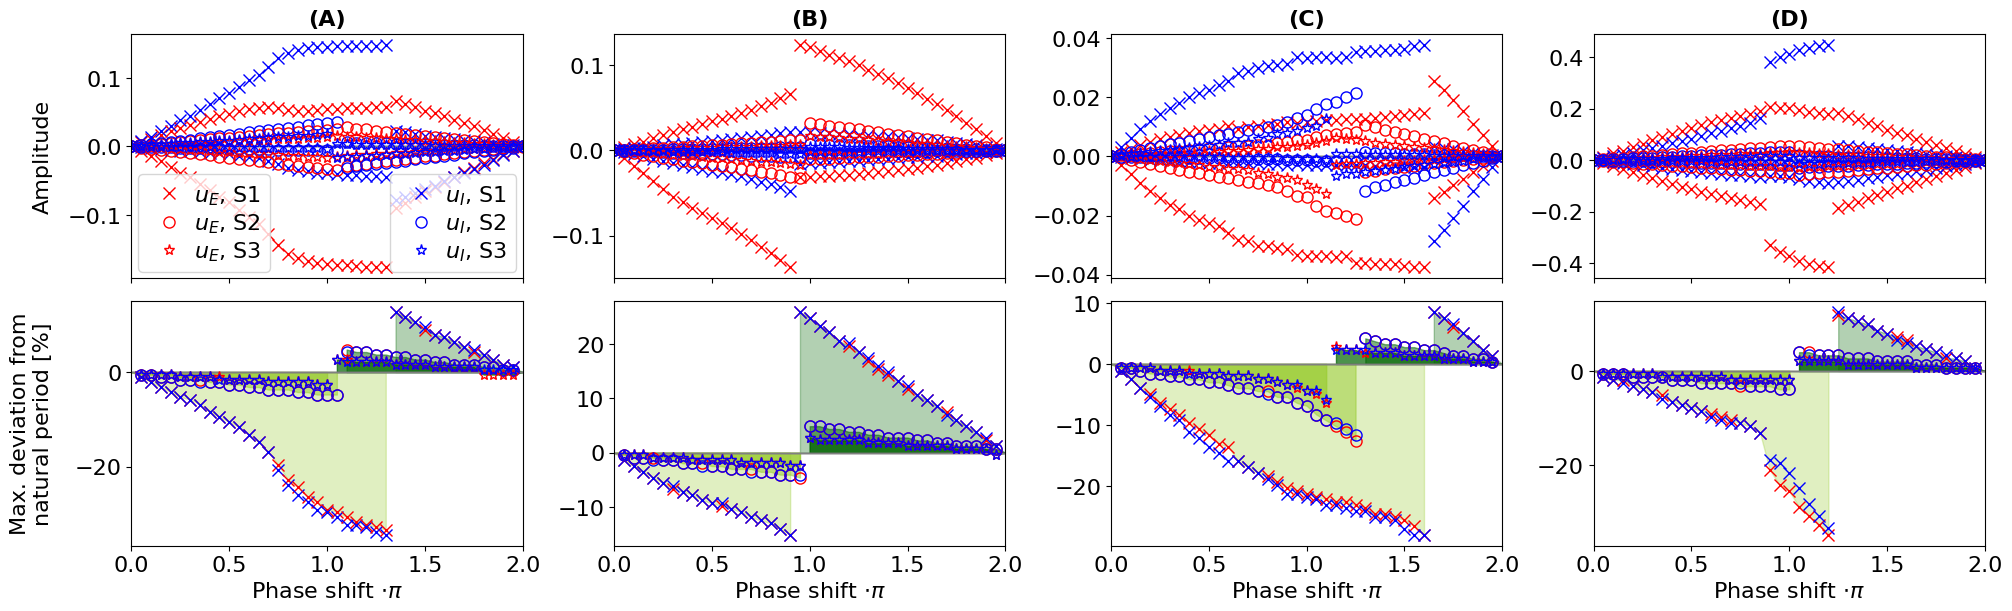

In [73]:
duration = [140., 300., 500.]
dt=0.1

percent = [0.1, 0.1, 0.1]
lim = [80., 250., 450.]
dist = [20., 100, 200]

activity_lim = [0.4, 0.55, 0.55, 0.55]
control_lim = [[0.3, 0.06, 0.025], [0.2, 0.1, 0.02], [0.1, 0.02, 0.002], [0.25, 0.1, 0.03]]

act_range = [0., 0.37]
c_range = np.array( [[-0.18, 0.18], [-0.04, 0.04], [-0.02, 0.02]] )

list_w1 = []
list_w2 = []

for ind_p in range(4):

    sp = os.path.join(savepath, add_point[ind_p])

    for ind_sc in range(3):
        
        filename = (add_point[ind_p] + '_' + add_sc[ind_sc] + '_')

        filehandler = open(os.path.join(openpath, filename + 'l1.pickle'),"rb")
        results_min_w1 = pickle.load(filehandler)
        filehandler.close()

        list_w1.append(results_min_w1)

        filehandler = open(os.path.join(openpath, filename + 'l2.pickle'),"rb")
        results_min_w2 = pickle.load(filehandler)
        filehandler.close()

        list_w2.append(results_min_w2)

    #ops_plot_traces(list_w1[-1], dt, "traces_" + add_point[ind_p] + ".png", sp)
    #ops_plot_traces(list_w2[-1], dt, "traces_" + add_point[ind_p] + "_l2.png", sp)

#ops_ap_scenes_allpoints(list_w1, periods, dt, "plot1_allscenes_allpoints", savepath)
ops_ap_scenes_allpoints(list_w2, periods, dt, "plot1_l2_allscenes_allpoints", savepath)

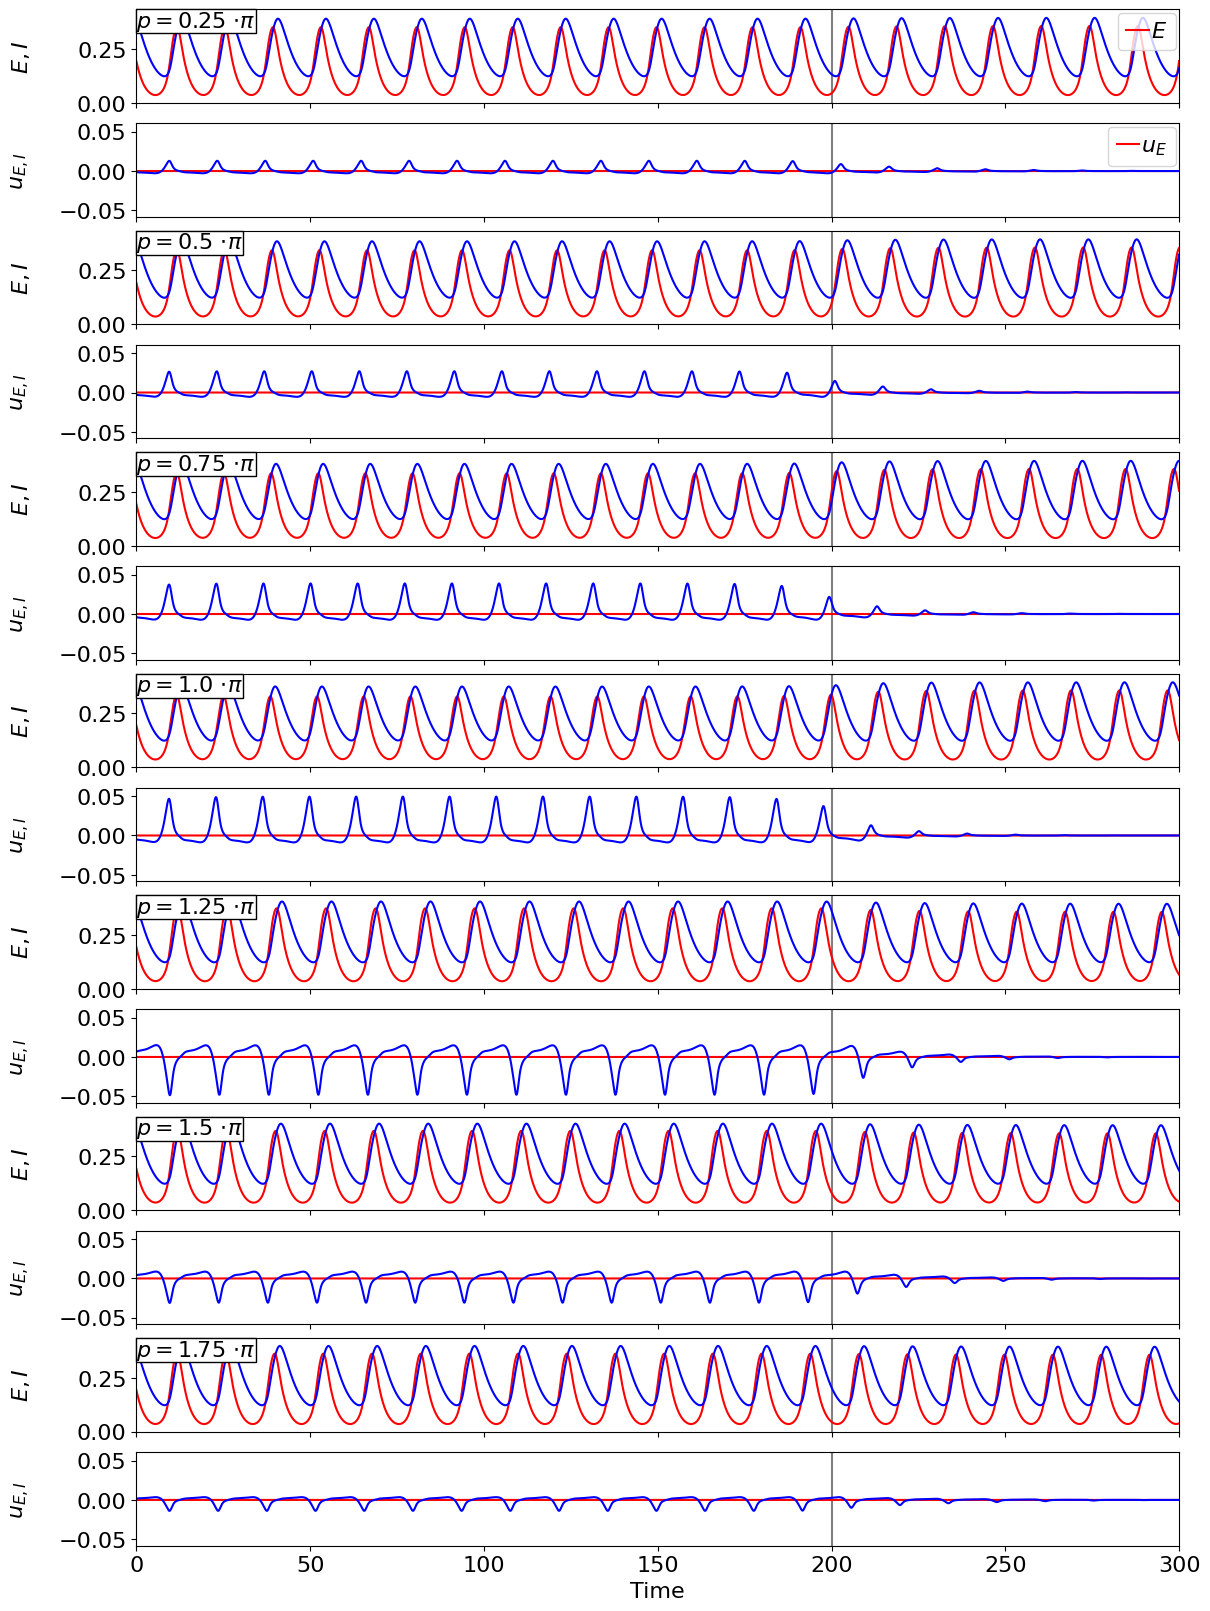

In [55]:
filehandler = open(os.path.join(openpath, "e_s1_l1_otherparams.pickle"),"rb")
s1_l1_params = pickle.load(filehandler)
filehandler.close()

ops_plotsubset(s1_l1_params, dt, "e_s1_l1_params.png", savepath)

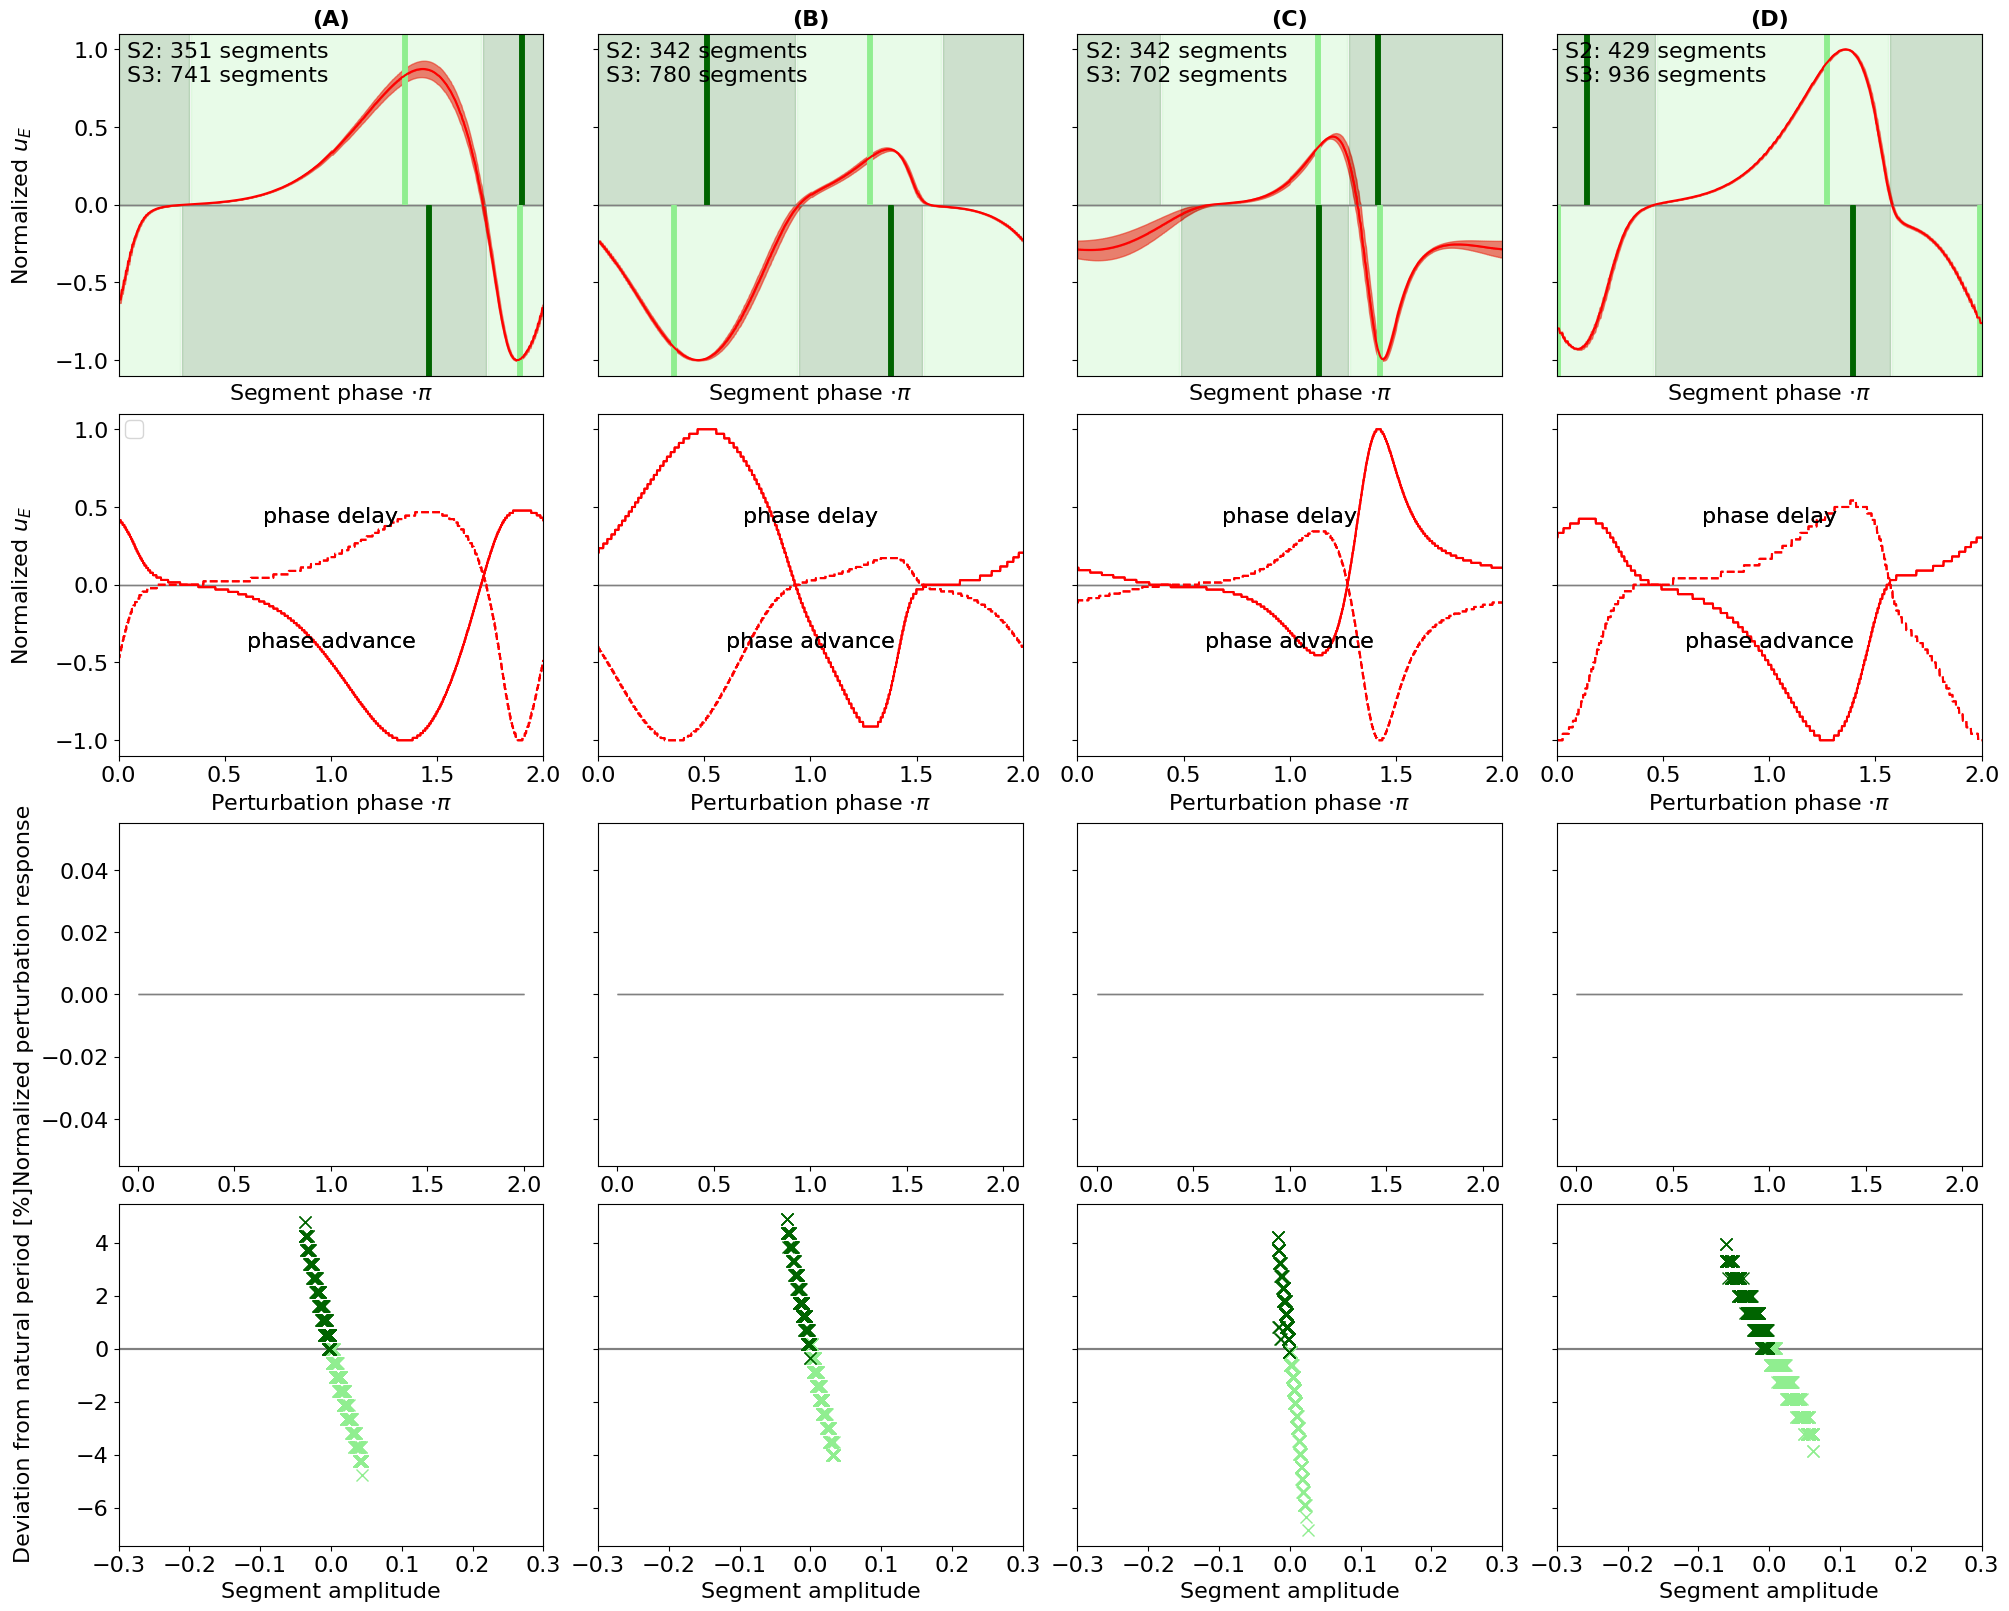

In [54]:
def normalizetimetrace(trace):
    res = np.zeros(( np.around(40/dt).astype(int) ))

    t_fraction = len(trace)/len(res)

    res[0] =  trace[0]
    for t in range(1, len(res)):
        res[t] = trace[int(t*t_fraction)]

    return res
    

cmap = plt.get_cmap('terrain')
dt = 0.1

fig, ax = plt.subplots(4, 4, figsize=(20,16), sharey="row", sharex="row", constrained_layout=True)

titlelist = ["(A)", "(B)", "(C)", "(D)"]
sclist = ["S1", "S2", "S3"]

start = [ [0, 0, 1], [0, 0, 0], [2, 0, 0], [0, 1, 1] ]
lim = [ [1, 9, 20], [1, 9, 20], [3, 9, 18], [2, 12, 25] ]
ind_strategyshift = [ [19, 21, 21], [18, 20, 20], [32, 25, 23], [22, 21, 21] ]
addind = [1, 1, 1, 1]

text_y = [0., 0.93, 0.86, 0.79]
time = np.linspace(0., 2., np.around(40/dt).astype(int) )

lw_ =  0.5
a1 = 0.1
a0 = 0.6
add = 0.01

for ind_p in range(4):

    tracelist = []

    amplist = []
    periodlist = []

    for ind_sc in range(1,3):

        filename = (add_point[ind_p] + '_' + add_sc[ind_sc] + '_')

        filehandler = open(os.path.join(openpath, filename + "l1.pickle"),"rb")
        results_min_w1 = pickle.load(filehandler)
        filehandler.close()

        counter = 0

        signs = np.zeros((41))
        signs[:ind_strategyshift[ind_p][ind_sc]] = 1.
        signs[ind_strategyshift[ind_p][ind_sc]:] = -1.

        for ip in range(1, 40):

            if ind_p == 2 and ind_sc == 0:
                continue

            if ind_p in [0] and ind_sc == 0 and ip in range(16,24):
                continue       

            if ind_p in [1] and ind_sc == 1 and ip in [1]:
                continue

            if ind_p in [2] and ind_sc in [1] and ip in [1]:
                continue

            zeros = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,:])[0]
        
            for i in range(start[ind_p][ind_sc], min(len(zeros),lim[ind_p][ind_sc]), addind[ind_p]):

                trace = normalizetimetrace( results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                tracelist.append(signs[ip] * trace)
                #if signs[ip] > 0:
                #    ax[0,ind_p].plot(time, signs[ip] * trace, linewidth=lw_, color="lightgreen")
                #elif signs[ip] < 0:
                #    ax[0,ind_p].plot(time, signs[ip] * trace, linewidth=lw_, color="darkgreen")
                counter += 1

                if zeros[i] > 10:
                    statepeaks = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,zeros[i]-10:zeros[i+addind[ind_p]]+10])[0]
                    if len(statepeaks) != 2:
                        print("WARNING")
                        continue
                    periodlist.append( ((statepeaks[1] - statepeaks[0])*dt / periods[ind_p] - 1.)*100.  )
                    amplist.append( signs[ip] * np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                    if signs[ip] > 0:
                        ax[3,ind_p].plot(amplist[-1], periodlist[-1], marker="x", color="lightgreen")
                    else:
                        ax[3,ind_p].plot(amplist[-1], periodlist[-1], marker="x", color="darkgreen")


        ax[0,ind_p].text(0.02, text_y[ind_sc], sclist[ind_sc]  + ": " + str(counter) + " segments", ha="left", transform=ax[0,ind_p].transAxes)

        ax[0,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[1,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[2,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[3,ind_p].hlines(0., -0.5, 0.5, color="grey")
        ax[3,ind_p].set_xlim(-0.3, 0.3)

        prctime = np.linspace(0., 2., len(prc_results["ep"][ind_p][-1]))
        ax[1,ind_p].plot(prctime, prc_results["ep"][ind_p][-1], color="red")
        ax[1,ind_p].plot(prctime, prc_results["em"][ind_p][-1], color="red", linestyle="--")
        ax[1,ind_p].text(1., -0.4, "phase advance", ha="center")
        ax[1,ind_p].text(1., 0.4, "phase delay", ha="center")

        ax[0,ind_p].axvspan(0., zer[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen')
        ax[0,ind_p].axvspan(zer[ind_p,0,0]+add, zer[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen')
        ax[0,ind_p].axvspan(zer[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen')

        ax[0,ind_p].vlines(maxval[ind_p,0,0], 0., 1.1, color="lightgreen", linewidth=4)
        ax[0,ind_p].vlines(maxval[ind_p,0,1], 0., 1.1, color="darkgreen", linewidth=4)

        ax[0,ind_p].axvspan(0., zer[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen')
        ax[0,ind_p].axvspan(zer[ind_p,1,0]+add, zer[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen')
        ax[0,ind_p].axvspan(zer[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen')

        ax[0,ind_p].vlines(maxval[ind_p,1,1], -1.1, 0., color="darkgreen", linewidth=4)
        if ind_p == 3:
            ax[0,ind_p].vlines(0.006, -1.1, 0., color="lightgreen", linewidth=4)
            ax[0,ind_p].vlines(1.994, -1.1, 0., color="lightgreen", linewidth=4)
        else:
            ax[0,ind_p].vlines(maxval[ind_p,1,0], -1.1, 0., color="lightgreen", linewidth=4)

    tr = np.zeros(( len(tracelist), len(trace) ))
    for i in range(len(tracelist)):
        tr[i,:] = tracelist[i]
    trmean = np.mean(tr, axis=0)
    trstd = np.std(tr, axis=0)
    ax[0,ind_p].plot(time, trmean, color="red", label="Mean")
    ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color="red", alpha=a0, label="Standard deviation")
    ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color="red", alpha=a0)

    ax[0,ind_p].set_xlabel(r"Segment phase $\cdot \pi$")
    ax[0,ind_p].set_xlim(0,time[-1])
    ax[0,ind_p].set_xticks([])

    ax[0,0].set_ylim(-1.1, 1.1)
    ax[1,0].set_ylim(-1.1, 1.1)

    ax[1,ind_p].set_xlabel(r"Perturbation phase $\cdot \pi$")
    ax[1,ind_p].set_xlim(0,2.)

    ax[3,ind_p].set_xlabel(r"Segment amplitude")

    ax[0,ind_p].set_title(titlelist[ind_p], fontweight='bold')

ax[0,0].set_ylabel(r"Normalized $u_E$")
ax[1,0].set_ylabel(r"Normalized $u_E$")
ax[2,0].set_ylabel(r"Normalized perturbation response")
ax[3,0].set_ylabel(r"Deviation from natural period [%]")
for i in range(4):
    ax[i,0].yaxis.set_label_coords(-0.2, 0.5)


fig.savefig(os.path.join(savepath, "c_segment.png"))
plt.show()

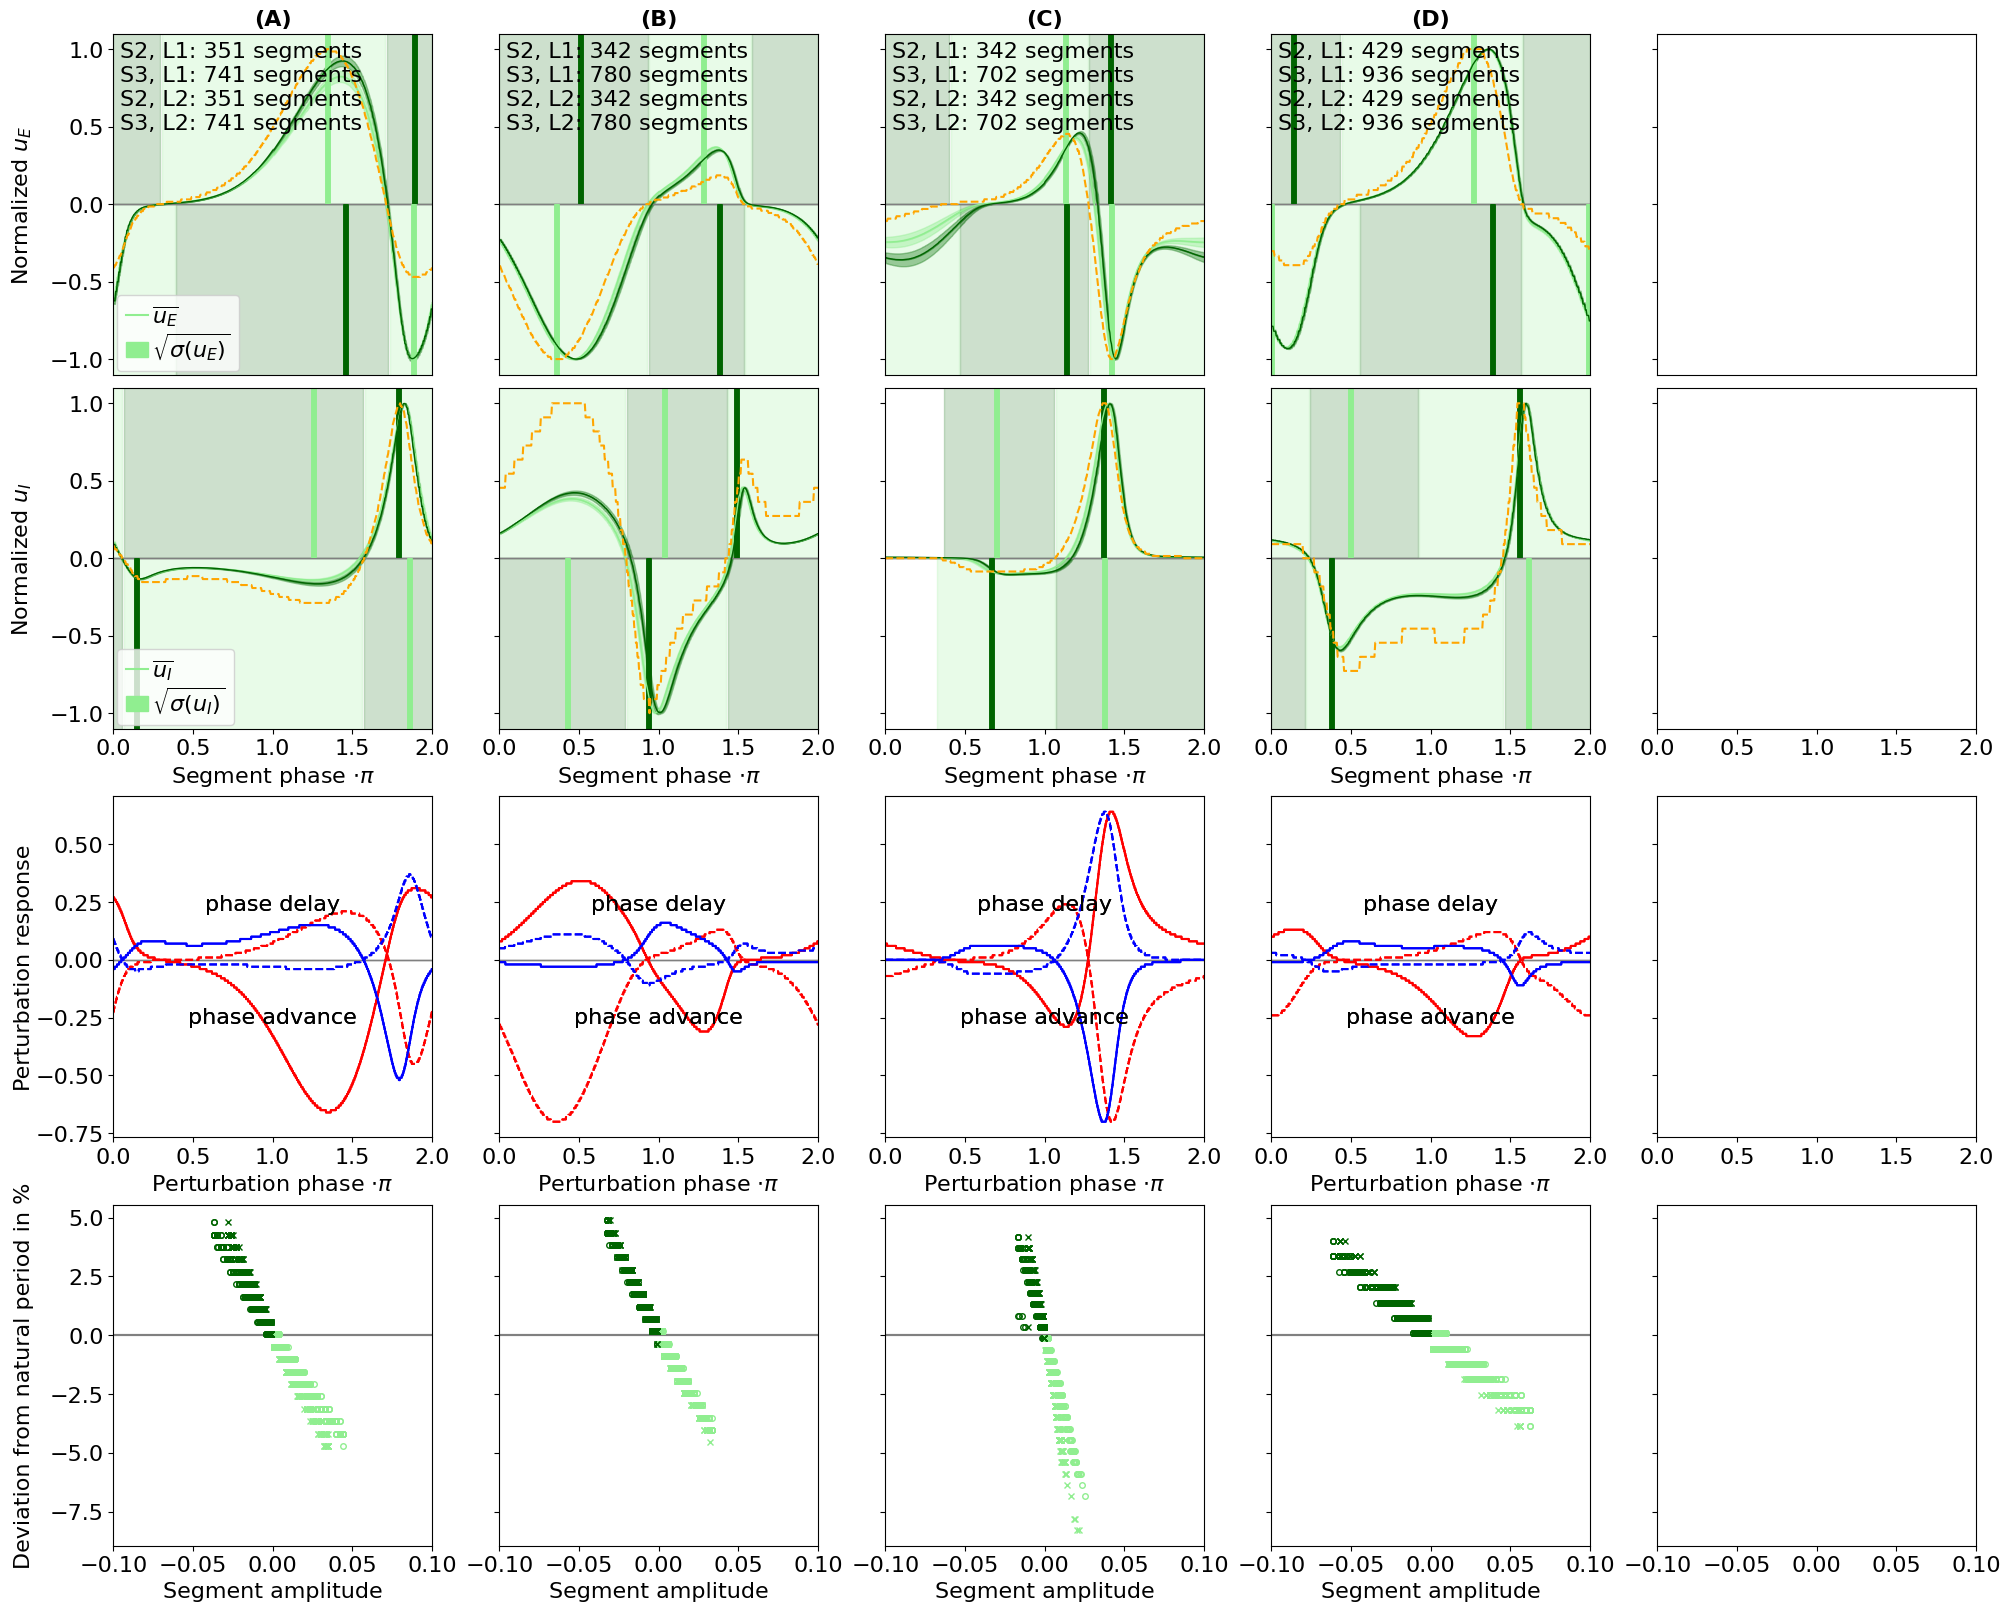

In [164]:
def normalizetimetrace(trace):
    res = np.zeros(( np.around(40/dt).astype(int) ))

    t_fraction = len(trace)/len(res)

    res[0] =  trace[0]
    for t in range(1, len(res)):
        res[t] = trace[int(t*t_fraction)]

    return res
    

cmap = plt.get_cmap('terrain')
dt = 0.1

fig, ax = plt.subplots(4, 5, figsize=(20,16), sharey="row", sharex="row", constrained_layout=True)

titlelist = ["(A)", "(B)", "(C)", "(D)", "(E)"]
sclist = ["S1", "S2", "S3"]

start = [ [0, 0, 1], [0, 0, 0], [2, 0, 0], [0, 1, 1] ]
lim = [ [1, 9, 20], [1, 9, 20], [3, 9, 18], [2, 12, 25] ]
ind_strategyshift = [ [19, 21, 21], [18, 20, 20], [32, 25, 23], [22, 21, 21] ]

start_l2 = [ [0, 0, 1], [0, 0, 0], [2, 0, 0], [0, 1, 1] ]
lim_l2 = [ [1, 9, 20], [1, 9, 20], [3, 9, 18], [2, 12, 25] ]
ind_strategyshift_l2 = [ [19, 22, 21], [18, 20, 20], [32, 26, 23], [22, 21, 21] ]

addind = [1, 1, 1, 1]

text_y = [0., 0.93, 0.86, 0.79]
text_y_l2 = [0., 0.79, 0.72]
time = np.linspace(0., 2., np.around(40/dt).astype(int) )

lw_ =  0.5
a1 = 0.1
a0 = 0.4
add = 0.01

ms_ = 4

import matplotlib.patches as mpatches

custom_legend = [
        Line2D([0], [0], color="lightgreen"),
        mpatches.Patch(color="lightgreen"),
    ]

for ind_p in range(4):

    tracelist_a = []
    tracelist_d = []

    tracelist_e_a = []
    tracelist_e_d = []

    tracelist_i_a = []
    tracelist_i_d = []

    amplist = []
    periodlist = []

    for ind_sc in range(1,3):

        filename = (add_point[ind_p] + '_' + add_sc[ind_sc] + '_')

        filehandler = open(os.path.join(openpath, filename + "l1.pickle"),"rb")
        results_min_w1 = pickle.load(filehandler)
        filehandler.close()

        counter = 0

        signs = np.zeros((41))
        signs[:ind_strategyshift[ind_p][ind_sc]] = 1.
        signs[ind_strategyshift[ind_p][ind_sc]:] = -1.

        for ip in range(1, 40):    

            if ind_p in [1] and ind_sc == 1 and ip in [1]:
                continue

            if ind_p in [2] and ind_sc in [1] and ip in [1]:
                continue

            zeros = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,:])[0]
        
            for i in range(start[ind_p][ind_sc], min(len(zeros),lim[ind_p][ind_sc]), addind[ind_p]):

                trace = normalizetimetrace( results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                if signs[ip] > 0:
                    tracelist_a.append(signs[ip] * trace)
                else:
                    tracelist_d.append(signs[ip] * trace)
                counter += 1

                if zeros[i] > 10:
                    statepeaks = scipy.signal.find_peaks(results_min_w1["state"][1][ip][0,0,zeros[i]-10:zeros[i+addind[ind_p]]+10])[0]
                    if len(statepeaks) != 2:
                        print("WARNING")
                        continue
                    p =  ((statepeaks[1] - statepeaks[0])*dt / periods[ind_p] - 1.)*100.  
                    a = signs[ip] * np.amax(np.abs(results_min_w1["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]]))
                    if signs[ip] > 0:
                        ax[3,ind_p].plot(a, p, marker="o", color="lightgreen", fillstyle="none", markersize=ms_)
                    else:
                        ax[3,ind_p].plot(a, p, marker="o", color="darkgreen", fillstyle="none", markersize=ms_)


        ax[0,ind_p].text(0.02, text_y[ind_sc], sclist[ind_sc]  + ", L1: " + str(counter) + " segments", ha="left", transform=ax[0,ind_p].transAxes)

        filehandler = open(os.path.join(openpath, filename + "l2.pickle"),"rb")
        results_min_w2 = pickle.load(filehandler)
        filehandler.close()

        counter = 0

        signs = np.zeros((41))
        signs[:ind_strategyshift_l2[ind_p][ind_sc]] = 1.
        signs[ind_strategyshift_l2[ind_p][ind_sc]:] = -1.

        for ip in range(1, 40):    

            if ind_p in [1] and ind_sc == 1 and ip in [1]:
                continue

            if ind_p in [2] and ind_sc in [1] and ip in [1]:
                continue

            zeros = scipy.signal.find_peaks(results_min_w2["state"][1][ip][0,0,:])[0]

            perl = []
            for k in range(1, len(zeros)):
                perl.append(zeros[k] - zeros[k-1])
        
            for i in range(start_l2[ind_p][ind_sc], min(len(zeros),lim_l2[ind_p][ind_sc]), addind[ind_p]):

                trace = normalizetimetrace( results_min_w2["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w2["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]])) )
                trace_i = normalizetimetrace( results_min_w2["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]] / np.amax(np.abs(results_min_w2["control"][1][ip][0,1,zeros[i]:zeros[i+addind[ind_p]]])) )
                if signs[ip] > 0:
                    tracelist_a.append(signs[ip] * trace)
                    tracelist_i_a.append(signs[ip] * trace_i)
                else:
                    tracelist_d.append(signs[ip] * trace)
                    tracelist_i_d.append(signs[ip] * trace_i)
                counter += 1

                if zeros[i] > 10:
                    statepeaks = scipy.signal.find_peaks(results_min_w2["state"][1][ip][0,0,zeros[i]-10:zeros[i+addind[ind_p]]+10])[0]
                    if len(statepeaks) != 2:
                        print("WARNING")
                        continue
                    p =  ((statepeaks[1] - statepeaks[0])*dt / periods[ind_p] - 1.)*100.  
                    a = signs[ip] * np.amax(np.abs(results_min_w2["control"][1][ip][0,0,zeros[i]:zeros[i+addind[ind_p]]]))
                    if signs[ip] > 0:
                        ax[3,ind_p].plot(a, p, marker="x", color="lightgreen", markersize=ms_)
                    else:
                        ax[3,ind_p].plot(a, p, marker="x", color="darkgreen", markersize=ms_)


        ax[0,ind_p].text(0.02, text_y_l2[ind_sc], sclist[ind_sc]  + ", L2: " + str(counter) + " segments", ha="left", transform=ax[0,ind_p].transAxes)

        ax[0,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[1,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[2,ind_p].hlines(0., 0., 2., color="grey", linewidth=1)
        ax[3,ind_p].hlines(0., -0.5, 0.5, color="grey")
        ax[3,ind_p].set_xlim(-0.1, 0.1)

        prctime = np.linspace(0., 2., len(prc_results["ep"][ind_p][-1]))
        ax[2,ind_p].plot(prctime, prc_results["ep"][ind_p][-1], color="red")
        ax[2,ind_p].plot(prctime, prc_results["em"][ind_p][-1], color="red", linestyle="--")
        ax[2,ind_p].plot(prctime, prc_results["ip"][ind_p][-1], color="blue")
        ax[2,ind_p].plot(prctime, prc_results["im"][ind_p][-1], color="blue", linestyle="--")
        ax[2,ind_p].text(0.5, 0.333, "phase advance", ha="center", transform=ax[2,ind_p].transAxes)
        ax[2,ind_p].text(0.5, 0.666, "phase delay", ha="center", transform=ax[2,ind_p].transAxes)



        #################################################
        ax[0,ind_p].axvspan(0., zer[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen')
        ax[0,ind_p].axvspan(zer[ind_p,0,0]+add, zer[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen')
        ax[0,ind_p].axvspan(zer[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen')

        ax[0,ind_p].vlines(maxval[ind_p,0,0], 0., 1.1, color="lightgreen", linewidth=4)
        ax[0,ind_p].vlines(maxval[ind_p,0,1], 0., 1.1, color="darkgreen", linewidth=4)

        ax[0,ind_p].axvspan(0., zer[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen')
        ax[0,ind_p].axvspan(zer[ind_p,1,0]+add, zer[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen')
        ax[0,ind_p].axvspan(zer[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen')

        ax[0,ind_p].vlines(maxval[ind_p,1,1], -1.1, 0., color="darkgreen", linewidth=4)
        if ind_p == 3:
            ax[0,ind_p].vlines(0.006, -1.1, 0., color="lightgreen", linewidth=4)
            ax[0,ind_p].vlines(1.994, -1.1, 0., color="lightgreen", linewidth=4)
        else:
            ax[0,ind_p].vlines(maxval[ind_p,1,0], -1.1, 0., color="lightgreen", linewidth=4)
        ##########################################################
        if ind_p not in [2]:
            ax[1,ind_p].axvspan(0., zer_i[ind_p,0,0], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen')
        ax[1,ind_p].axvspan(zer_i[ind_p,0,0]+add, zer_i[ind_p,0,1], ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='darkgreen')
        ax[1,ind_p].axvspan(zer_i[ind_p,0,1]+add, 2., ymin=0.5, ymax=1.1, alpha=a1, lw=None, color='lightgreen')

        ax[1,ind_p].vlines(maxval_i[ind_p,0,0], 0., 1.1, color="darkgreen", linewidth=4)
        ax[1,ind_p].vlines(maxval_i[ind_p,0,1], 0., 1.1, color="lightgreen", linewidth=4)

        if ind_p not in [2]:
            ax[1,ind_p].axvspan(0., zer_i[ind_p,1,0], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen')
        ax[1,ind_p].axvspan(zer_i[ind_p,1,0]+add, zer_i[ind_p,1,1], ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='lightgreen')
        ax[1,ind_p].axvspan(zer_i[ind_p,1,1]+add, 2., ymin=-1.1, ymax=0.5, alpha=a1, lw=None, color='darkgreen')

        ax[1,ind_p].vlines(maxval_i[ind_p,1,1], -1.1, 0., color="lightgreen", linewidth=4)
        ax[1,ind_p].vlines(maxval_i[ind_p,1,0], -1.1, 0., color="darkgreen", linewidth=4)

        


    trlist = [tracelist_a, tracelist_d]
    collist = ["lightgreen", "darkgreen"]

    for i in range(len(trlist)):
        trl = trlist[i]
        tr = np.zeros(( len(trl), len(trace) ))
        for j in range(len(trl)):
            tr[j,:] = trl[j]
        trmean = np.mean(tr, axis=0)
        trstd = np.std(tr, axis=0)
        ax[0,ind_p].plot(time, trmean, color=collist[i], linewidth=1)
        ax[0,ind_p].fill_between(time, trmean, trmean+trstd, color=collist[i], alpha=a0)
        ax[0,ind_p].fill_between(time, trmean, trmean-trstd, color=collist[i], alpha=a0)

    trlist = [tracelist_i_a, tracelist_i_d]
    collist = ["lightgreen", "darkgreen"]

    for i in range(len(trlist)):
        trl = trlist[i]
        tr = np.zeros(( len(trl), len(trace) ))
        for j in range(len(trl)):
            tr[j,:] = trl[j]
        trmean = np.mean(tr, axis=0)
        trstd = np.std(tr, axis=0)
        ax[1,ind_p].plot(time, trmean, color=collist[i], linewidth=1)
        ax[1,ind_p].fill_between(time, trmean, trmean+trstd, color=collist[i], alpha=a0)
        ax[1,ind_p].fill_between(time, trmean, trmean-trstd, color=collist[i], alpha=a0)

    ax[1,ind_p].set_xlabel(r"Segment phase $\cdot \pi$")
    ax[0,ind_p].set_xlim(0,time[-1])
    ax[1,ind_p].set_xlim(0,time[-1])
    ax[0,ind_p].set_xticks([])

    ax[0,0].set_ylim(-1.1, 1.1)
    ax[1,0].set_ylim(-1.1, 1.1)

    ax[0,0].legend(
        custom_legend,
        [r"$\overline{u_E}$", r"$\sqrt{\sigma(u_E)}$"],
        loc="lower left",
        labelspacing=0.1,
        handletextpad=0.2,
        handlelength=1,
        borderaxespad=0.15,
    )

    ax[1,0].legend(
        custom_legend,
        [r"$\overline{u_I}$", r"$\sqrt{\sigma(u_I)}$"],
        loc="lower left",
        labelspacing=0.1,
        handletextpad=0.2,
        handlelength=1,
        borderaxespad=0.15,
    )

    ax[2,ind_p].set_xlabel(r"Perturbation phase $\cdot \pi$")
    ax[2,ind_p].set_xlim(0,2.)

    ax[3,ind_p].set_xlabel(r"Segment amplitude")

    ax[0,ind_p].set_title(titlelist[ind_p], fontweight='bold')

ax[0,0].set_ylabel(r"Normalized $u_E$")
ax[1,0].set_ylabel(r"Normalized $u_I$")
ax[2,0].set_ylabel(r"Perturbation response")
ax[3,0].set_ylabel(r"Deviation from natural period in %")
for i in range(4):
    ax[i,0].yaxis.set_label_coords(-0.25, 0.5)

ax[0,0].plot(time, normalizetimetrace(-prc_results["ep"][0][-1]/np.amax(np.abs(prc_results["ep"][0][-1]))), color="orange", linestyle="--")
ax[0,1].plot(time, normalizetimetrace(prc_results["em"][1][-1]/np.amax(np.abs(prc_results["em"][1][-1]))), color="orange", linestyle="--")
ax[0,2].plot(time, normalizetimetrace(-prc_results["ep"][2][-1]/np.amax(np.abs(prc_results["ep"][2][-1]))), color="orange", linestyle="--")
ax[0,3].plot(time, normalizetimetrace(-prc_results["ep"][3][-1]/np.amax(np.abs(prc_results["ep"][3][-1]))), color="orange", linestyle="--")

ax[1,0].plot(time, normalizetimetrace(-prc_results["ip"][0][-1]/np.amax(np.abs(prc_results["ip"][0][-1]))), color="orange", linestyle="--")
ax[1,1].plot(time, normalizetimetrace(prc_results["im"][1][-1]/np.amax(np.abs(prc_results["im"][1][-1]))), color="orange", linestyle="--")
ax[1,2].plot(time, normalizetimetrace(-prc_results["ip"][2][-1]/np.amax(np.abs(prc_results["ip"][2][-1]))), color="orange", linestyle="--")
ax[1,3].plot(time, normalizetimetrace(-prc_results["ip"][3][-1]/np.amax(np.abs(prc_results["ip"][3][-1]))), color="orange", linestyle="--")


fig.savefig(os.path.join(savepath, "c_segment.png"))
plt.show()

In [160]:
zer = np.zeros((4, 2, 2))
maxval = np.zeros((4, 2, 2))

zer_i = np.zeros((4, 2, 2))
maxval_i = np.zeros((4, 2, 2))

for ip in range(4):
    p = prc_results["point"][ip]
    print(p)

    zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ep"][ip][-1]))[0][0]
    zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ep"][ip][-1]))[0][1]
    zer[ip,0, :] = [ 2. * zerind0 / len(prc_results["ep"][ip][-1]), 2. * zerind1 / len(prc_results["ep"][ip][-1]) ]

    maxv = np.amax(-prc_results["ep"][ip][-1])
    maxval[ip,0,0] = 2. * np.mean(np.where(maxv == -prc_results["ep"][ip][-1])) / len(prc_results["ep"][ip][-1])
    maxv = np.amax(prc_results["ep"][ip][-1])
    maxval[ip,0,1] = 2. * np.mean(np.where(maxv == prc_results["ep"][ip][-1])) / len(prc_results["ep"][ip][-1])

    print(maxval[ip,0,:])
    
    zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["em"][ip][-1]))[0][0]
    zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["em"][ip][-1]))[0][1]
    zer[ip,1, :] = [ 2. * zerind0 / len(prc_results["em"][ip][-1]), 2. * zerind1 / len(prc_results["em"][ip][-1]) ]

    maxv = np.amax(-prc_results["em"][ip][-1])
    maxval[ip,1,0] = 2. * np.mean(np.where(maxv == -prc_results["em"][ip][-1])) / len(prc_results["em"][ip][-1])
    maxv = np.amax(prc_results["em"][ip][-1])
    maxval[ip,1,1] = 2. * np.mean(np.where(maxv == prc_results["em"][ip][-1])) / len(prc_results["em"][ip][-1])

    print(maxval[ip,1,:])

    if ip == 3:
        maxv = np.amax(-prc_results["em"][ip][-1])
        maxval[ip,1,0] = 0.005

    if ip == 0:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][2]
    elif ip == 2:
        zerind0 = np.where(prc_results["ip"][ip][-1] > 0.)[0][0]
        zerind1 =scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
    else:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["ip"][ip][-1]))[0][1]

    zer_i[ip,0, :] = [ 2. * zerind0 / len(prc_results["ip"][ip][-1]), 2. * zerind1 / len(prc_results["ip"][ip][-1]) ]

    maxv = np.amax(-prc_results["ip"][ip][-1])
    maxval_i[ip,0,0] = 2. * np.mean(np.where(maxv == -prc_results["ip"][ip][-1])) / len(prc_results["ip"][ip][-1])
    maxv = np.amax(prc_results["ip"][ip][-1])
    maxval_i[ip,0,1] = 2. * np.mean(np.where(maxv == prc_results["ip"][ip][-1])) / len(prc_results["ip"][ip][-1])

    print(maxval_i[ip,0,:])

    if ip == 0:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][2]
    elif ip == 2:
        zerind0 = np.where(prc_results["im"][ip][-1] < 0.)[0][0]
        zerind1 =scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][0]
    else:
        zerind0 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][0]
        zerind1 = scipy.signal.find_peaks(-np.abs(prc_results["im"][ip][-1]))[0][1]
    zer_i[ip,1, :] = [ 2. * zerind0 / len(prc_results["im"][ip][-1]), 2. * zerind1 / len(prc_results["im"][ip][-1]) ]

    maxv = np.amax(-prc_results["im"][ip][-1])
    maxval_i[ip,1,0] = 2. * np.mean(np.where(maxv == -prc_results["im"][ip][-1])) / len(prc_results["im"][ip][-1])
    maxv = np.amax(prc_results["im"][ip][-1])
    maxval_i[ip,1,1] = 2. * np.mean(np.where(maxv == prc_results["im"][ip][-1])) / len(prc_results["im"][ip][-1])

    print(maxval_i[ip,1,:])


[1.0, 0.0]
[1.34867352 1.89604764]
[1.8890092  1.46237141]
[1.79371955 1.25825663]
[0.14834867 1.85868977]
[2.5, 0.0]
[1.28381963 0.51246684]
[0.35915119 1.38196286]
[1.4928382  1.04244032]
[0.93952255 0.43236074]
[2.6, 1.2]
[1.1339439  1.41728678]
[1.42301088 1.13680595]
[1.36920435 0.69891242]
[0.66971952 1.37607327]
[1.75, 0.0]
[1.26933333 0.14066667]
[0.8892459  1.38933333]
[1.56066667 0.50133333]
[0.38333333 1.61733333]


In [55]:
prc_results = dict([
    ('point', [ [1., 0.], [2.5, 0.], [2.6, 1.2], [1.75,0.], [2.8, 1.2] ]),
    ('ep', [None, None, None, None, None]),
    ('em', [None, None, None, None, None]),
    ('ip', [None, None, None, None, None]),
    ('im', [None, None, None, None, None]),
    ('period', [ np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))), np.zeros((len(dist_array))) ] ),
])

In [56]:
dist_array = [1.]
width_array = [0.1]
dt_array = [0.01]

for ip in range(len(prc_results['point'])):
    wc = WCModel()
    dist_array = [1.]
    width_array = [0.1]
    dt_array = [0.01]

    if ip in [2]:
        dist_array = [0.1]
    if ip in [4]:
        wc.params.c_excinh = 10
        wc.params.c_inhexc = 16
        wc.params.c_inhinh = 1
    p = prc_results["point"][ip]
    print(p)
    prc_results["ep"][ip], prc_results["em"][ip], prc_results["ip"][ip], prc_results["im"][ip], prc_results["period"][ip] = get_prc(wc, p, dist_array, width_array, dt_array, norm=False)
    wc = WCModel()

[1.0, 0.0]
0
[2.5, 0.0]
0
[2.6, 1.2]
0
[1.75, 0.0]
0
[2.8, 1.2]
0


0
1
2
3
4


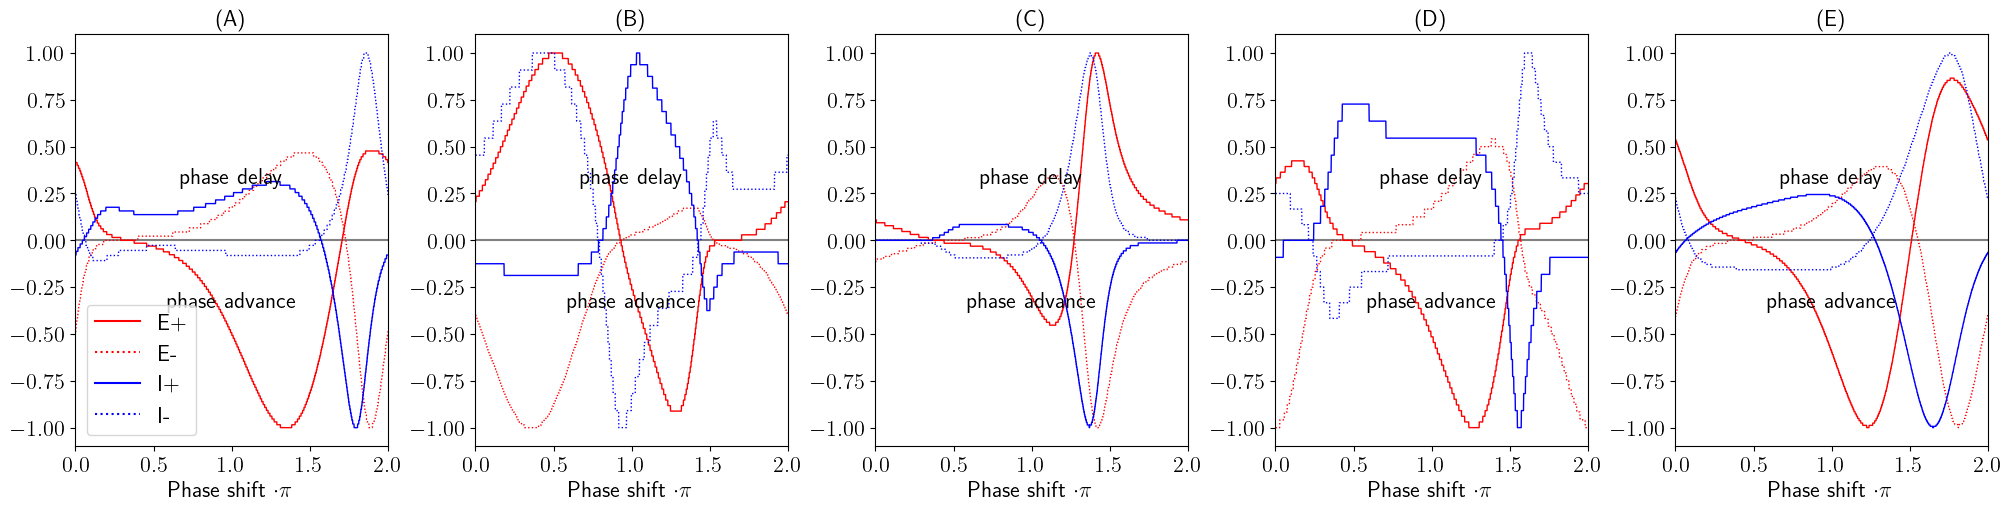

In [22]:
plot_prc(prc_results, dist_array, "prc.png", savepath)

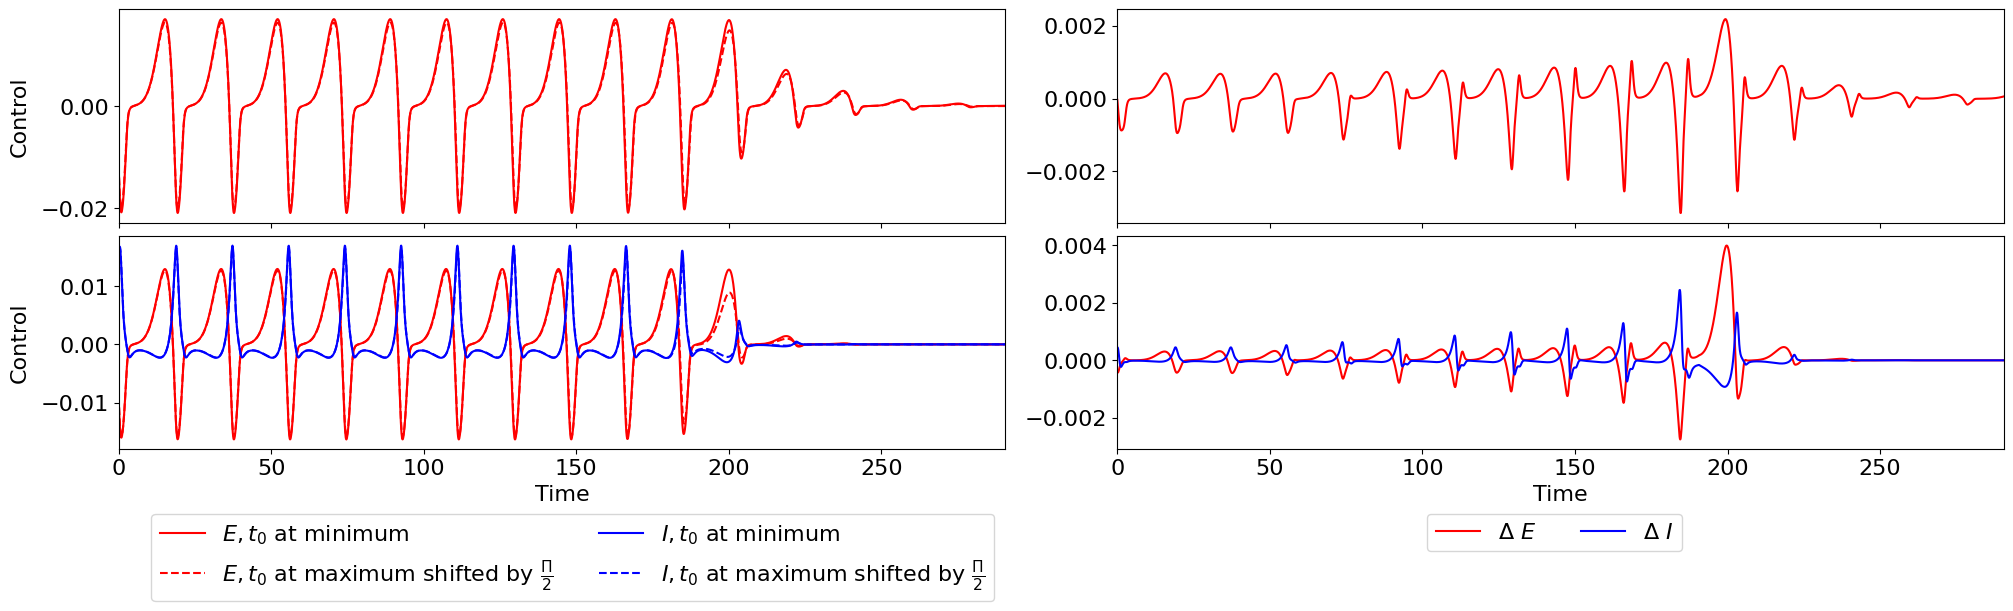

[ 152  337  521  706  891 1076 1260 1445 1630 1815 2005 2193 2382 2571
 2760]
[ 152  337  522  706  891 1076 1261 1446 1631 1816 2007 2195 2384 2573
 2762 2905]


In [57]:
filehandler = open(os.path.join(openpath, "a_s2_l1.pickle"),"rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l1_max.pickle"),"rb")
results_peak_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2.pickle"),"rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2_max.pickle"),"rb")
results_peak_w2 = pickle.load(filehandler)
filehandler.close()

iadd = -6

t1 = results_min_w1["control"][1][10][0,0,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2 = results_peak_w1["control"][1][10][0,0,np.around(periods[0]/2./dt).astype(int)+iadd:]

time = np.linspace(0., 300.0 -  periods[0]/2., len(t1))

fig, ax = plt.subplots(2, 2, figsize=(20, 6), sharex=True, constrained_layout=True)

ax[0,0].plot(time, t1, color="red")
ax[0,0].plot(time, t2, color="red", linestyle="--")

ax[0,1].plot(time, t1-t2, color="red")

t1 = results_min_w2["control"][1][10][0,0,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2 = results_peak_w2["control"][1][10][0,0,np.around(periods[0]/2./dt).astype(int)+iadd:]

t1i = results_min_w2["control"][1][10][0,1,:-np.around(periods[0]/2./dt).astype(int)-iadd]
t2i = results_peak_w2["control"][1][10][0,1,np.around(periods[0]/2./dt).astype(int)+iadd:]

ax[1,0].plot(time, t1, color="red", label=r"$E, t_0$ at minimum")
ax[1,0].plot(time, t2, color="red", linestyle="--", label=r"$E, t_0$ at maximum shifted by $\frac{\Pi}{2}$")
ax[1,0].plot(time, t1i, color="blue", label=r"$I, t_0$ at minimum")
ax[1,0].plot(time, t2i, color="blue", linestyle="--", label=r"$I, t_0$ at maximum shifted by $\frac{\Pi}{2}$")

ax[1,1].plot(time, t1-t2, color="red", label=r"$\Delta~ E$")
ax[1,1].plot(time, t1i-t2i, color="blue", label=r"$\Delta~ I$")

ax[0,0].set_xlim(0., 300.0 -  periods[0]/2.)
ax[1,0].set_xlabel("Time")
ax[1,1].set_xlabel("Time")
ax[0,0].set_ylabel("Control")
ax[1,0].set_ylabel("Control")

ax[1,0].legend(ncol=2, bbox_to_anchor=[1.0, -0.25])
ax[1,1].legend(ncol=2, bbox_to_anchor=[0.65, -0.25])

ax[0,0].yaxis.set_label_coords(-0.1, 0.5)
ax[1,0].yaxis.set_label_coords(-0.1, 0.5)

fig.savefig(os.path.join(savepath, "inits_ps.png"))
plt.show()

print(scipy.signal.find_peaks(t1)[0]) # 152
print(scipy.signal.find_peaks(t2)[0]) # 146

In [58]:
def normalizetimetrace_t(trace, t, dt):
    res = np.zeros(( np.around(t/dt).astype(int) ))

    t_fraction = len(trace)/len(res)

    res[0] =  trace[0]
    for t in range(1, len(res)):
        res[t] = trace[int(t*t_fraction)]

    return res

In [60]:
filehandler = open(os.path.join(openpath, "a_s2_l2.pickle"),"rb")
results_min_w2 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l2_dt.pickle"),"rb")
results_peak_w2_dt = pickle.load(filehandler)
filehandler.close()

t1 = results_min_w2["state"][1][10]
c1 = results_min_w2["control"][1][10]
t2 = results_peak_w2_dt["state"][1][10]
c2 = results_peak_w2_dt["control"][1][10]

t1_transform = np.zeros((t2.shape))
c1_transform = np.zeros((c2.shape))

for t in range(t1.shape[2]-1):
    for i in range(10):
        t1_transform[:,:,10*t+i] = t1[:,:,t]
        c1_transform[:,:,10*t+i] = c1[:,:,t]

t1_transform[:,:,-1] = t1_transform[:,:,-2]


t2_0 = t2[:,:,464:20000]
t2_0e = normalizetimetrace_t(t2_0[0,0,:], 200.01, 0.01)
t2_0i = normalizetimetrace_t(t2_0[0,1,:], 200.01, 0.01)

t2_1 = t2[:,:,20000:-232]
t2_1e = normalizetimetrace_t(t2_1[0,0,:], 100, 0.01)
t2_1i = normalizetimetrace_t(t2_1[0,1,:], 100, 0.01)

t2_normalized = np.zeros((t1_transform.shape))
t2_normalized[0,0,:20001] = t2_0e
t2_normalized[0,1,:20001] = t2_0i
t2_normalized[0,0,20001:] = t2_1e
t2_normalized[0,1,20001:] = t2_1i

c2_0 = c2[:,:,464:20000]
c2_0e = normalizetimetrace_t(c2_0[0,0,:], 200.01, 0.01)
c2_0i = normalizetimetrace_t(c2_0[0,1,:], 200.01, 0.01)

c2_1 = c2[:,:,20000:-232]
c2_1e = normalizetimetrace_t(c2_1[0,0,:], 100, 0.01)
c2_1i = normalizetimetrace_t(c2_1[0,1,:], 100, 0.01)

c2_normalized = np.zeros((c1_transform.shape))
c2_normalized[0,0,:20001] = c2_0e
c2_normalized[0,1,:20001] = c2_0i
c2_normalized[0,0,20001:] = c2_1e
c2_normalized[0,1,20001:] = c2_1i

0.033396794568300275
0.03476541467897898
0.0028572109074241313
0.003406710339409119


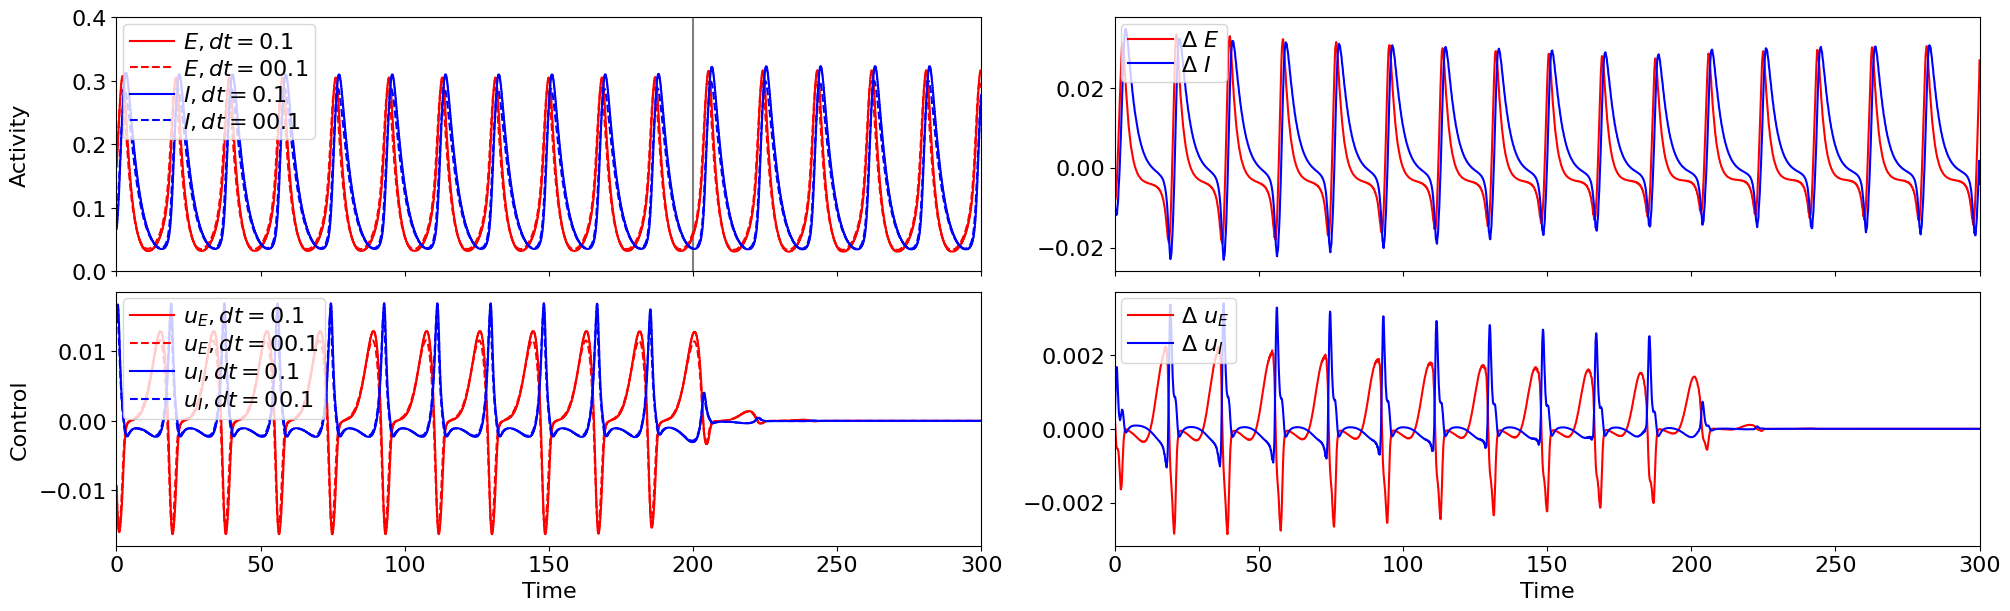

In [61]:
time = np.linspace(0., 300., t2.shape[2])
fig, ax = plt.subplots(2, 2, figsize=(20, 6), sharex=True, constrained_layout=True)

ax[0,0].plot(time, t1_transform[0,0,:], color="red", label=r"$E, dt=0.1~$")
ax[0,0].plot(time, t2_normalized[0,0,:], color="red", linestyle="--", label=r"$E, dt=00.1~$")
ax[0,0].plot(time, t1_transform[0,1,:], color="blue", label=r"$I, dt=0.1~$")
ax[0,0].plot(time, t2_normalized[0,1,:], color="blue", linestyle="--", label=r"$I, dt=00.1~$")

ax[1,0].plot(time, c1_transform[0,0,:], color="red", label=r"$u_E, dt=0.1~$")
ax[1,0].plot(time, c2_normalized[0,0,:], color="red", linestyle="--", label=r"$u_E, dt=00.1~$")
ax[1,0].plot(time, c1_transform[0,1,:], color="blue", label=r"$u_I, dt=0.1~$")
ax[1,0].plot(time, c2_normalized[0,1,:], color="blue", linestyle="--", label=r"$u_I, dt=00.1~$")


ax[0,1].plot(time[::10], t1_transform[0,0,::10]- t2_normalized[0,0,::10], color="red", label=r"$\Delta ~ E$")
ax[0,1].plot(time[::10], t1_transform[0,1,::10]- t2_normalized[0,1,::10], color="blue", label=r"$\Delta ~ I$")

ax[1,1].plot(time[::10], c1_transform[0,0,::10] - c2_normalized[0,0,::10], color="red", label=r"$\Delta ~ u_E$")
ax[1,1].plot(time[::10], c1_transform[0,1,::10] - c2_normalized[0,1,::10], color="blue", label=r"$\Delta ~ u_I$")

print(np.amax(np.abs(t1_transform[0,0,::10]- t2_normalized[0,0,::10])))
print(np.amax(np.abs(t1_transform[0,1,::10]- t2_normalized[0,1,::10])))
print(np.amax(np.abs(c1_transform[0,0,::10]- c2_normalized[0,0,::10])))
print(np.amax(np.abs(c1_transform[0,1,::10]- c2_normalized[0,1,::10])))

ax[0,0].set_xlim(0., duration[1])

ax[1,0].set_xlabel(r"Time")
ax[1,1].set_xlabel(r"Time")
ax[0,0].set_ylim(0., 0.4)
ax[0,0].vlines(200., 0., 0.6, color="grey")

ax[0,0].legend(loc="upper left", labelspacing=0.2, handletextpad=0.4, borderaxespad=0.3, borderpad=0.3)
ax[1,0].legend(loc="upper left", labelspacing=0.2, handletextpad=0.4, borderaxespad=0.3, borderpad=0.3)
ax[0,1].legend(loc="upper left", labelspacing=0.2, handletextpad=0.4, borderaxespad=0.3, borderpad=0.3)
ax[1,1].legend(loc="upper left", labelspacing=0.2, handletextpad=0.4, borderaxespad=0.3, borderpad=0.3)

ax[0,0].set_ylabel(r"Activity")
ax[1,0].set_ylabel(r"Control")
ax[0,0].yaxis.set_label_coords(-0.1,0.5)
ax[1,0].yaxis.set_label_coords(-0.1,0.5)

plt.savefig(os.path.join(savepath, "traces_dt_ps.png"))
plt.show()

[1.4901623407448383e-08, 1.6856686962940515e-08] [2.0077256621120476e-07, 1.3363695838819467e-07]


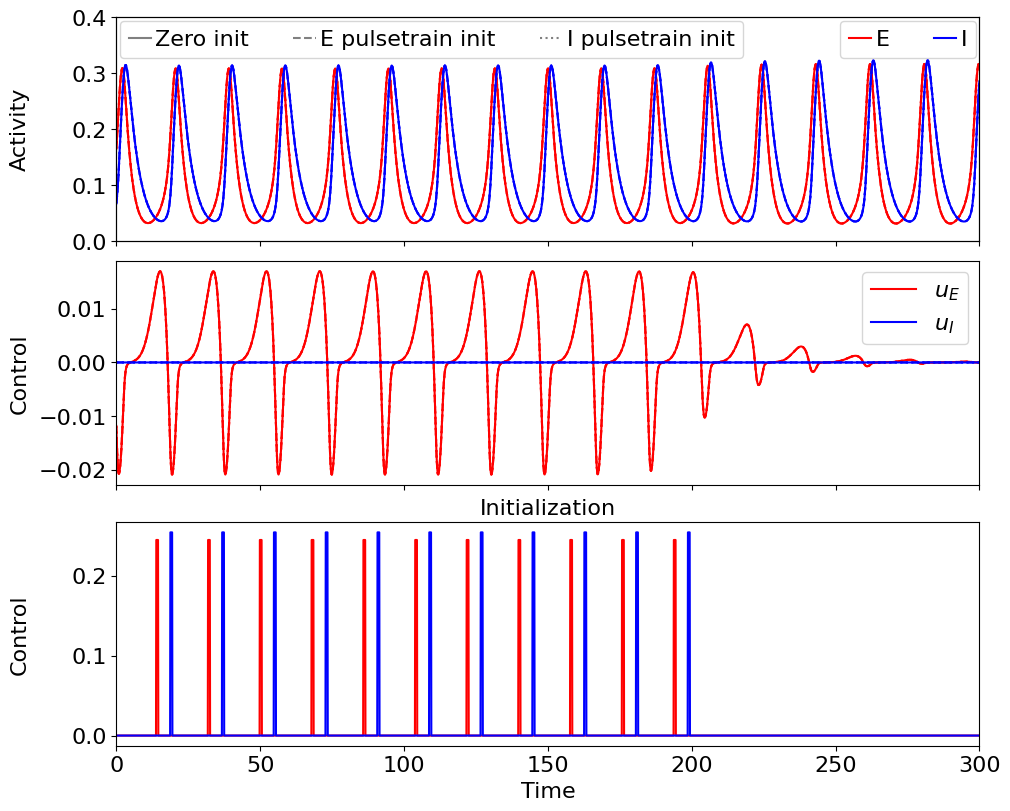

In [70]:
filehandler = open(os.path.join(openpath, "a_s2_l1.pickle"),"rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l1_pulsetrain.pickle"),"rb")
results_pulse_w1 = pickle.load(filehandler)
filehandler.close()

t1 = results_min_w1["state"][1][10][0,:,:]
t2 = results_pulse_w1["state"][0][10][0,:,:]
t3 = results_pulse_w1["state"][1][10][0,:,:]

i2 = results_pulse_w1["control_init"][0][10][0,:,:]
i3 = results_pulse_w1["control_init"][1][10][0,:,:]

c1 = results_min_w1["control"][1][10][0,:,:]
c2 = results_pulse_w1["control"][1][10][0,:,:]
c3 = results_pulse_w1["control"][0][10][0,:,:]

custom_legend = [
        Line2D([0], [0], color="grey"),
        Line2D([0], [0], color="grey", linestyle="--"),
        Line2D([0], [0], color="grey", linestyle=":"),
    ]

custom_legend1 = [
        Line2D([0], [0], color="red"),
        Line2D([0], [0], color="blue"),
    ]

time = np.linspace(0., 300.0, t1.shape[1])

fig, ax = plt.subplots(3, 1, figsize=(10, 8), sharex=True, constrained_layout=True)

ax[0].plot(time, t1[0,:], color="red", label=r"E")
ax[0].plot(time, t2[0,:], color="red", linestyle="--")
ax[0].plot(time, t3[0,:], color="red", linestyle=":")

ax[0].plot(time, t1[1,:], color="blue", label=r"I")
ax[0].plot(time, t2[1,:], color="blue", linestyle="--")
ax[0].plot(time, t3[1,:], color="blue", linestyle=":")

maxdiff_2 = [np.amax(t1[0,:]-t2[0,:]), np.amax(t1[1,:]-t2[1,:])]
maxdiff_3 = [np.amax(t1[0,:]-t3[0,:]), np.amax(t1[1,:]-t3[1,:])]
print(maxdiff_2, maxdiff_3)

str = r"$\Delta~ E \leq $" + "{:.2E}".format(max(maxdiff_2[0], maxdiff_3[0]))

ax[1].plot(time, c1[0,:], color="red", label=r"$u_E$")
ax[1].plot(time, c2[0,:], color="red", linestyle="--")
ax[1].plot(time, c3[0,:], color="red", linestyle=":")

ax[1].plot(time, c1[1,:], color="blue", label=r"$u_I$")
ax[1].plot(time, c2[1,:], color="blue", linestyle="--")
ax[1].plot(time, c3[1,:], color="blue", linestyle=":")

ax[2].plot(time, i2[0,:], color="red", label=r"$E initialization")
ax[2].plot(time, i3[1,:], color="blue", label=r"$I initialization")

ax[0].set_xlim(0., 300.0 )
ax[0].set_ylim(0., 0.4 )
ax[-1].set_xlabel("Time")
ax[0].set_ylabel("Activity")
ax[1].set_ylabel("Control")
ax[2].set_ylabel("Control")

ax[0].yaxis.set_label_coords(-0.1, 0.5)
ax[1].yaxis.set_label_coords(-0.1, 0.5)
ax[2].yaxis.set_label_coords(-0.1, 0.5)

ax[0].legend(
    custom_legend,
    [r"Zero init", r"E pulsetrain init", r"I pulsetrain init"],
    loc="upper left",
    ncol=3,
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax2 = ax[0].twinx()
ax2.get_yaxis().set_visible(False)

ax2.legend(
    custom_legend1,
    [r"E", r"I"],
    loc="upper right",
    ncol=3,
    labelspacing=0.1,
    handletextpad=0.2,
    handlelength=1,
    borderaxespad=0.15,
)

ax[1].legend(loc="upper right")

ax[2].set_title("Initialization")

fig.savefig(os.path.join(savepath, "inits_ps_pulsetrain.png"))
plt.show()



[0.022030565939076152, 0.014748472219165809] [0.008179329210755227, 0.001286579452705428]


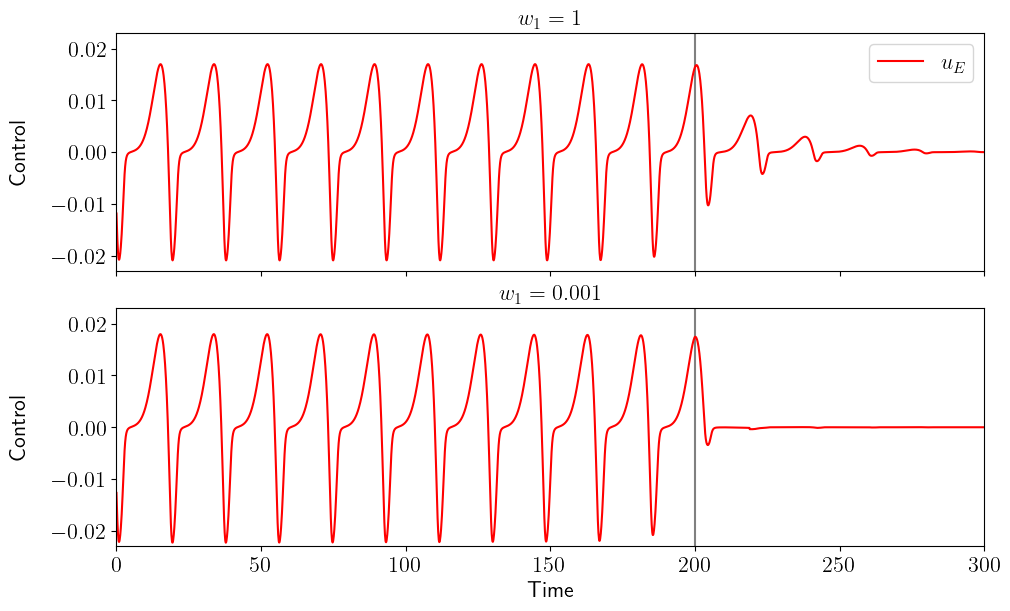

In [35]:
filehandler = open(os.path.join(openpath, "a_s2_l1.pickle"),"rb")
results_min_w1 = pickle.load(filehandler)
filehandler.close()

filehandler = open(os.path.join(openpath, "a_s2_l1_wp.pickle"),"rb")
results_pulse_w1 = pickle.load(filehandler)
filehandler.close()

t1 = results_min_w1["state"][1][10][0,:,:]
t2 = results_pulse_w1["state"][1][10][0,:,:]

c1 = results_min_w1["control"][1][10][0,:,:]
c2 = results_pulse_w1["control"][1][10][0,:,:]

maxdiff_t = [np.amax(t1[0,:]-t2[0,:]), np.amax(t1[1,:]-t2[1,:])]
maxdiff_c = [np.amax(c1[0,:]-c2[0,:]), np.amax(c1[1,:]-c2[1,:])]
print(maxdiff_t, maxdiff_c)

time = np.linspace(0., 300.0, t1.shape[1])

fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, constrained_layout=True)

#ax[0,0].plot(time, t1[0,:], color="red", label=r"$E, w_1=1$")
#ax[0,0].plot(time, t2[0,:], color="red", linestyle="--", label=r"$E, w_1=0.001$")

#ax[0,0].plot(time, t1[1,:], color="blue", label=r"$I, w_1=1$")
#ax[0,0].plot(time, t2[1,:], color="blue", linestyle="--", label=r"$I, w_1=0.001$")

ax[0].plot(time, c1[0,:], color="red", label=r"$u_E$")
ax[1].plot(time, c2[0,:], color="red")

#ax[0,1].plot(time, t1[0,:] - t2[0,:], color="red", label=r"$\Delta~ E$")
#ax[0,1].plot(time, t1[1,:] - t2[1,:], color="blue", label=r"$\Delta~ I$")

#ax[1,1].plot(time, c1[0,:] - c2[0,:], color="red", label=r"$\Delta~ u_E$")

ax[0].set_xlim(0., 300.0 )
ax[1].set_xlabel("Time")
#ax[1,1].set_xlabel("Time")
ax[0].set_ylabel("Control")
ax[1].set_ylabel("Control")

ax[0].yaxis.set_label_coords(-0.1, 0.5)
ax[1].yaxis.set_label_coords(-0.1, 0.5)

ylim0, ylim1 = -0.023, 0.023
ax[0].set_ylim(ylim0, ylim1 )
ax[0].vlines(200., ylim0, ylim1, color="grey")
ax[1].set_ylim(ylim0, ylim1 )
ax[1].vlines(200., ylim0, ylim1, color="grey")

ax[0].legend(loc="upper right")

ax[0].set_title(r"$w_1=1$")
ax[1].set_title(r"$w_1=0.001$")

fig.savefig(os.path.join(savepath, "ps_wp.png"))
plt.show()




In [31]:
print(np.amax(np.abs(c2[:,2100])))
print(np.amax(np.abs(c2[:,2074])))

4.460993451355568e-05
9.711494340140321e-05


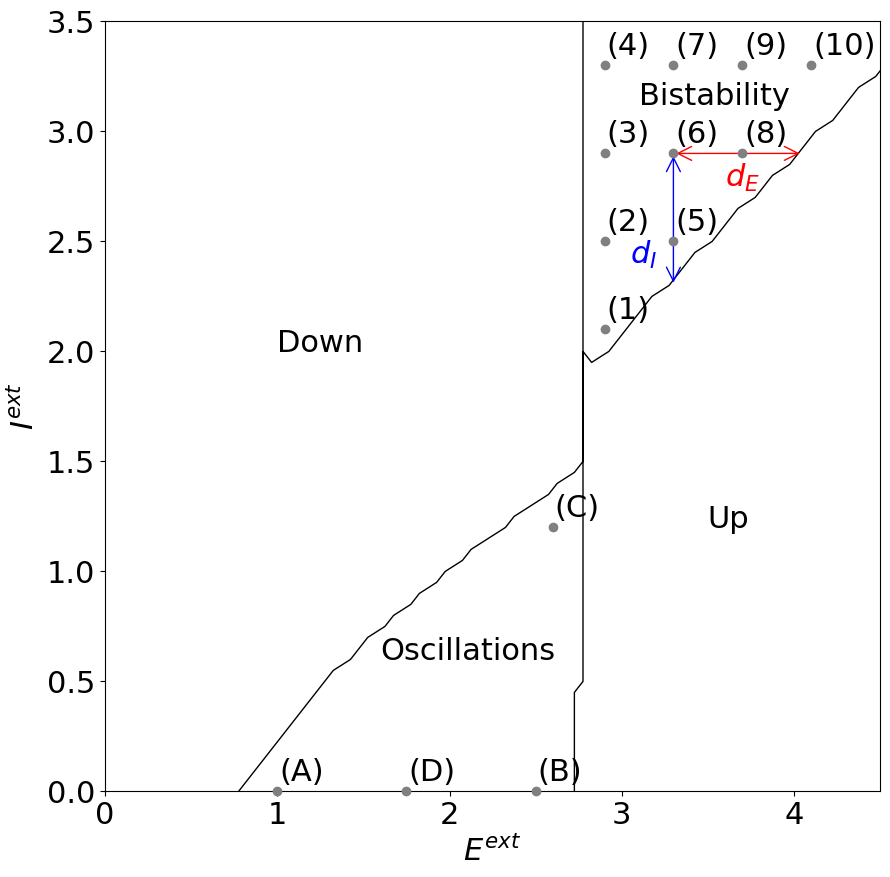

In [175]:
filehandler = open("../../data/boundary_bi.pickle","rb")
boundary_bi = pickle.load(filehandler)
filehandler.close()
boundary_bi_e = boundary_bi[0]
boundary_bi_i = boundary_bi[1]

filehandler = open("../../data/boundary_osc.pickle","rb")
boundary_LC = pickle.load(filehandler)
filehandler.close()
boundary_LC_e = boundary_LC[0]
boundary_LC_i = boundary_LC[1]

points = [[1., 0.], [2.5, 0.], [2.6, 1.2], [1.75, 0.]]
labels = [r"(A)", r"(B)", r"(C)", r"(D)"]

points_bi = [
    [2.9, 2.1], [2.9, 2.5], [2.9, 2.9], [2.9, 3.3],
    [3.3, 2.5], [3.3, 2.9], [3.3, 3.3],
    [3.7, 2.9], [3.7, 3.3],
    [4.1, 3.3],
]
labels_bi = []
for i in range(1, 12, 1):
    labels_bi.append("(" + str(i) + ")")

ms_ = 12
fs_ = 22
import matplotlib.font_manager

fig, ax = plt.subplots(1, 1, figsize=(10,10))
ax.plot(boundary_LC_e, boundary_LC_i, color='black', linewidth=1)
ax.plot(boundary_bi_e, boundary_bi_i, color='black', linewidth=1)
ax.set_xlabel(r'$E^{ext}$', fontsize=fs_)
ax.set_ylabel(r'$I^{ext}$', fontname="Nimbus Roman", fontsize=fs_)
ax.set_xlim(0,4.5)
ax.set_ylim(0,3.5)
ax.tick_params(axis='both', labelsize=fs_)

for i in range(len(points)):
    p=points[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels[i], size=fs_)

for i in range(len(points_bi)):
    p=points_bi[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="grey", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels_bi[i], size=fs_)

ax.annotate("", xy=(4.05, points_bi[5][1]), xytext=(points_bi[5][0], points_bi[5][1]), arrowprops=dict(arrowstyle="<->", mutation_scale=25, color="red"))
ax.text(3.6, 2.75, r"$d_E$", fontsize=fs_, color="red")
ax.annotate("", xy=(points_bi[5][0], 2.3), xytext=(points_bi[5][0], points_bi[5][1]), arrowprops=dict(arrowstyle="<->", mutation_scale=25, color="blue"))
ax.text(3.05, 2.4, r"$d_I$", fontsize=fs_, color="blue")

ax.text(1., 2., r"Down", size=fs_)
ax.text(3.5, 1.2, r"Up", size=fs_)
ax.text(1.6, 0.6, r"Oscillations", size=fs_)
ax.text(3.1, 3.12, r"Bistability", size=fs_)

fig.savefig(os.path.join(savepath, "statespace.png"))
plt.show()

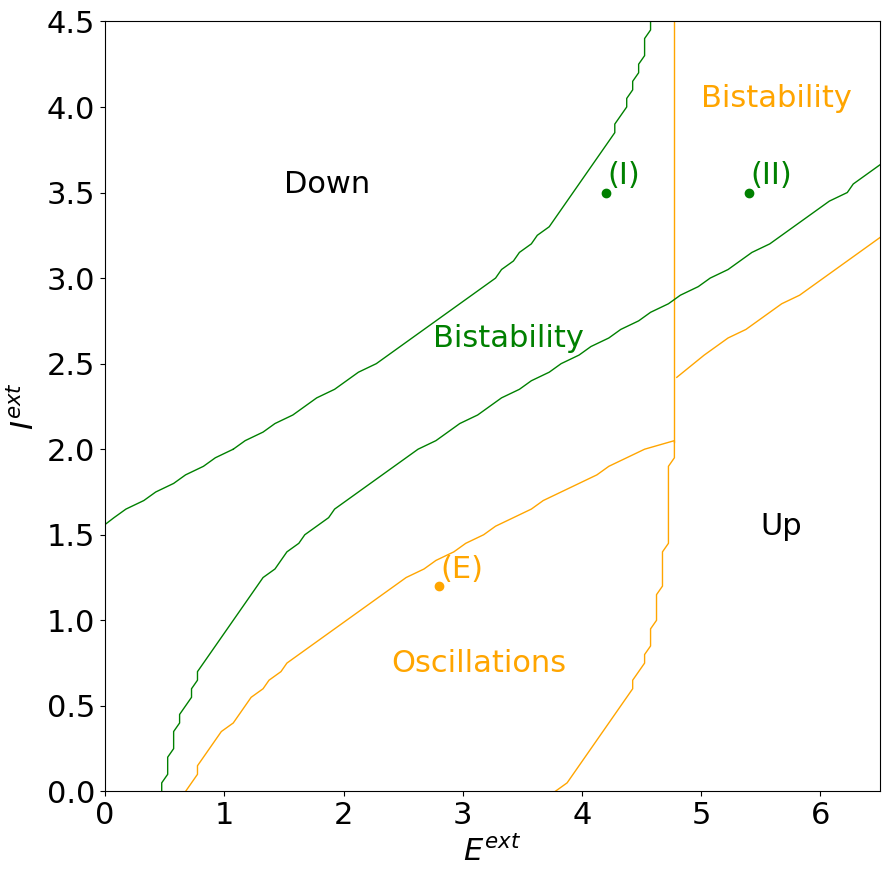

In [240]:
filehandler = open("../../data/boundary_bi_1.pickle","rb")
boundary_bi_1 = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_1 = boundary_bi_1[0]
boundary_bi_i_1 = boundary_bi_1[1]

filehandler = open("../../data/boundary_osc_1.pickle","rb")
boundary_osc_1 = pickle.load(filehandler)
filehandler.close()
boundary_osc_e_1 = boundary_osc_1[0]
boundary_osc_i_1 = boundary_osc_1[1]

fig, ax = plt.subplots(1, 1, figsize=(10,10))

boundary_bi_e_1[62] -= 0.08
boundary_bi_i_1[62] -= 0.08

boundary_bi_i_1[59] -= 0.06

ax.plot(boundary_bi_e_1[:60], boundary_bi_i_1[:60], color='orange', linewidth=1)
ax.plot(boundary_bi_e_1[62:], boundary_bi_i_1[62:], color='orange', linewidth=1)

ax.plot(boundary_osc_e_1, boundary_osc_i_1, color='orange', linewidth=1)

ax.plot(2.8, 1.2, marker=".", markersize=ms_, color="orange", zorder=10, clip_on=False)
ax.text(2.8+0.01, 1.2+0.05, "(E)", size=fs_, color="orange")

filehandler = open("../../data/boundary_bi_2.pickle","rb")
boundary_bi_1 = pickle.load(filehandler)
filehandler.close()
boundary_bi_e_1 = boundary_bi_1[0]
boundary_bi_i_1 = boundary_bi_1[1]

filehandler = open("../../data/boundary_osc_2.pickle","rb")
boundary_osc_1 = pickle.load(filehandler)
filehandler.close()
boundary_osc_e_1 = [0.]
boundary_osc_i_1 = [boundary_osc_1[1][0]-0.04]
for i in range(len(boundary_osc_1[0])):
    boundary_osc_e_1.append(boundary_osc_1[0][i])
    boundary_osc_i_1.append(boundary_osc_1[1][i])

ax.plot(boundary_bi_e_1[:62], boundary_bi_i_1[:62], color='green', linewidth=1)
ax.plot(boundary_bi_e_1[62:], boundary_bi_i_1[62:], color='green', linewidth=1)
ax.plot(boundary_osc_e_1, boundary_osc_i_1, color='green', linewidth=1)


points_bi = [[4.2, 3.5], [5.4, 3.5] ]
labels_bi = [ r"(I)", r"(II)" ]

for i in range(len(points_bi)):
    p=points_bi[i]
    ax.plot(p[0], p[1], marker=".", markersize=ms_, color="green", zorder=10, clip_on=False)
    ax.text(p[0]+0.01, p[1]+0.05, labels_bi[i], size=fs_, color="green")

ax.set_xlim(0,6.5)
ax.set_ylim(0,4.5)

ax.text(1.5, 3.5, r"Down", size=fs_, color="black")
ax.text(5.5, 1.5, r"Up", size=fs_, color="black")
ax.text(2.4, 0.7, r"Oscillations", size=fs_, color="orange")
ax.text(5., 4., r"Bistability", size=fs_, color="orange")

ax.text(2.75, 2.6, r"Bistability", size=fs_, color="green")

ax.set_xlabel(r'$E^{ext}$', fontsize=fs_)
ax.set_ylabel(r'$I^{ext}$', fontname="Nimbus Roman", fontsize=fs_)
ax.tick_params(axis='both', labelsize=fs_)

fig.savefig(os.path.join(savepath, "statespace_1.png"))
plt.show()